In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Dataa.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

# New Section

In [5]:
df.head(12)

,Production
Date,
1,7
2,6
3,8
4,27
5,9
6,7
7,7
8,2
9,3


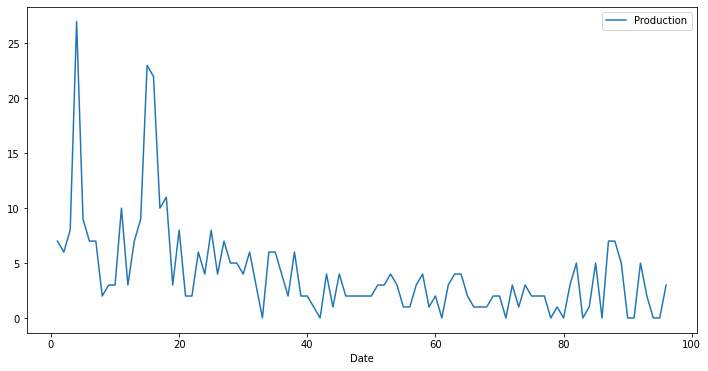

In [6]:
df.plot(figsize=(12,6))

In [7]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
df.head(),df.tail()

(      Production
 Date            
 1              7
 2              6
 3              8
 4             27
 5              9,       Production
 Date            
 92             5
 93             2
 94             0
 95             0
 96             3)

In [11]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [12]:
scaled_train[:10]

array([[0.25925926],
       [0.22222222],
       [0.2962963 ],
       [1.        ],
       [0.33333333],
       [0.25925926],
       [0.25925926],
       [0.07407407],
       [0.11111111],
       [0.11111111]])

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
X.shape

(1, 3, 1)

In [17]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit model
model.fit(generator,epochs=80)


Epoch 1/80
72/72 [==============================] - 4s 55ms/step - loss: 0.0058
Epoch 2/80
72/72 [==============================] - 3s 35ms/step - loss: 0.0058
Epoch 3/80
72/72 [==============================] - 2s 22ms/step - loss: 0.0040
Epoch 4/80
72/72 [==============================] - 2s 22ms/step - loss: 0.0039
Epoch 5/80
72/72 [==============================] - 2s 22ms/step - loss: 0.0042
Epoch 6/80
72/72 [==============================] - 2s 21ms/step - loss: 0.0040
Epoch 7/80
72/72 [==============================] - 2s 21ms/step - loss: 0.0040
Epoch 8/80
72/72 [==============================] - 2s 21ms/step - loss: 0.0053
Epoch 9/80
72/72 [==============================] - 2s 22ms/step - loss: 0.0041
Epoch 10/80
72/72 [==============================] - 2s 22ms/step - loss: 0.0042
Epoch 11/80
72/72 [==============================] - 2s 21ms/step - loss: 0.0042
Epoch 12/80
72/72 [==============================] - 2s 21ms/step - loss: 0.0037
Epoch 13/80
72/72 [==================

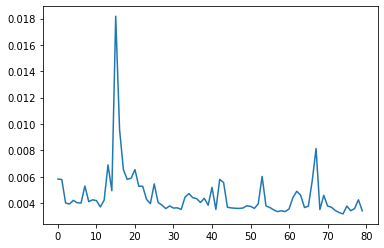

In [38]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [39]:
last_train_batch = scaled_train[-12:]

In [40]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(last_train_batch)

array([[0.05605356]], dtype=float32)

In [42]:
scaled_test[0]

array([0.18518519])

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [44]:
test_predictions

[array([0.05605356], dtype=float32),
 array([0.06084597], dtype=float32),
 array([0.05617704], dtype=float32),
 array([0.05627495], dtype=float32),
 array([0.05456161], dtype=float32),
 array([0.05068137], dtype=float32),
 array([0.05397899], dtype=float32),
 array([0.05650528], dtype=float32),
 array([0.07589617], dtype=float32),
 array([0.06492486], dtype=float32),
 array([0.05119877], dtype=float32),
 array([0.05406743], dtype=float32)]

In [45]:
test.head(12)

,Production,Predictions
Date,,
85,5,1.659962
86,0,1.744462
87,7,1.668051
88,7,1.668817
89,5,1.612050
90,0,1.507331
91,0,1.559665
92,5,1.667870
93,2,2.092085


In [65]:
true_predictions1 = scaler.inverse_transform(test_predictions)

In [1]:
true_predictions=(round(true_predictions1))

NameError: ignored

In [68]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
test.head(12)

,Production,Predictions
Date,,
85,5,2.0
86,0,2.0
87,7,2.0
88,7,2.0
89,5,1.0
90,0,1.0
91,0,1.0
92,5,2.0
93,2,2.0


In [70]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


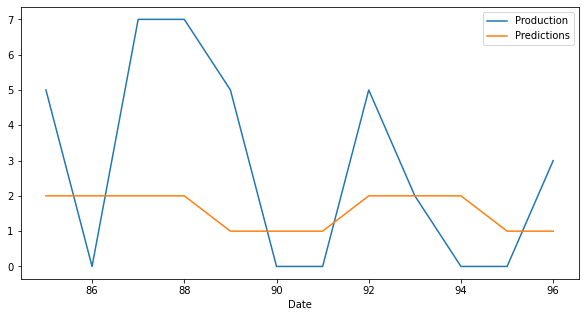

In [73]:
test.plot(figsize=(10,5))

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

2.8722813232690143
